In [ ]:
import pandas as pd
from gpt4all import GPT4All
from models.prompt_template import prompt_analyst_template

df = pd.read_csv('data/Sales Funnel.csv')

model = GPT4All(
    "oh-dcft-v3.1-claude-3-5-sonnet-20241022.Q8_0.gguf", 
    model_path="models/", 
    allow_download=False
)

system_prompt_analyst = prompt_analyst_template.format(
                df_info=df.info(),
                df_head=df.head(10)
            )

with model.chat_session(system_prompt=system_prompt_analyst) as session:
    first_response = session.generate("initiate conversation")
    print(f"\nResponse: {first_response}")
    while True:
        user_input = input("User: ")
        if user_input.lower() in ['exit', 'quit']:
            break
        response = session.generate(user_input)
        print(f"\nResponse: {response}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lead_id         100 non-null    int64 
 1   month           100 non-null    object
 2   leads_source    100 non-null    object
 3   trial_attended  100 non-null    int64 
 4   followup_done   100 non-null    int64 
 5   subscribed      100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB

Response: Hello! I'm your Data Analysis expert. Based on the dataset you've shared, which shows lead conversion metrics across different sources and time periods, there are several interesting analyses we could perform. Would you like me to:

1. Analyze the distribution of leads by source?
2. Examine how trial attendance correlates with subscription rates over time?
3. Create a visualization comparing conversion rates between different months?

Please let me know which aspect interests you

In [21]:
session_cm = model.chat_session(system_prompt=system_prompt_analyst)
session = session_cm.__enter__()
try:
    first_response = session.generate("initiate conversation")
    print(f"\nResponse: {first_response}")
    while True:
        user_input = input("User: ")
        if user_input.lower() in ['exit', 'quit']:
            break
        response = session.generate(user_input)
        print(f"\nResponse: {response}")
finally:
    session_cm.__exit__(None, None, None)


Response: Hello! I'm your Data Analysis expert specializing in Python and Seaborn. How may I help you analyze the dataset? Before we proceed, could you tell me a bit about what specific insights or patterns you're interested in exploring?

---

Let's start with understanding more about your goals for analyzing this data. What kind of information are you looking to uncover from these lead conversion metrics (leads_source, trial_attended, followup_done, subscribed)? This will help me provide the most relevant recommendations.



Response: I notice that "leads_source" has four distinct values: website, ads, referral, and blank. I can suggest a few ways to visualize this distribution:

1. A simple bar plot showing the count or percentage for each source
2. A pie chart comparing proportions
3. An area plot with trend over time if you have temporal data

Which type of visualization would be most helpful for your analysis? Also, do you want me to show absolute counts or percentages?



Respo

/var/folders/bc/4z8y43_54xs5_y4rkvml3mpm0000gn/T/ipykernel_20722/3265887968.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='leads_source', palette='pastel')


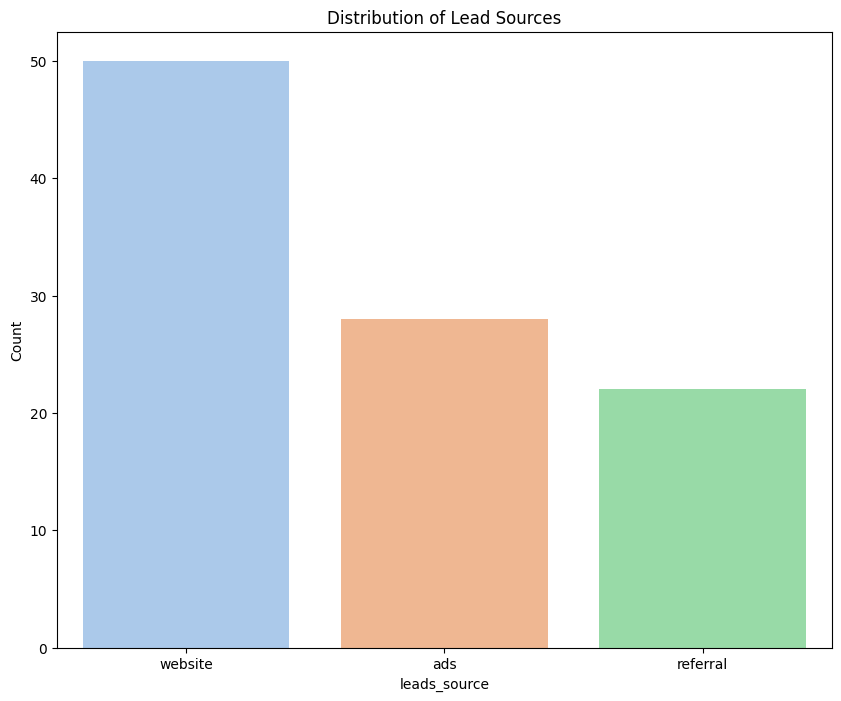

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create and display the pie chart
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='leads_source', palette='pastel')
plt.title('Distribution of Lead Sources')
plt.ylabel('Count')

plt.show()